In [1]:
# importing packages
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
import numpy as np
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix

In [2]:
# load MNIST into train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# for confusion matrix
y_begin = y_test

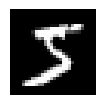

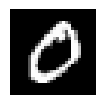

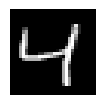

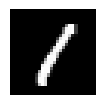

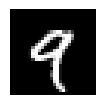

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [3]:
for i in range(5):  
    plt.subplot(350 + 1 + i)
# show image    
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis("off")
    plt.show()

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))    

In [4]:
# Normalize data for the model

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
num_classes= 10
# create the model
cnn_model = Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# compile the model
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model
cnn_model.fit(X_train, y_train, batch_size=125, epochs=10)

Epoch 1/10
480/480 [==============================] - 9s 19ms/step - loss: 0.3470 - accuracy: 0.8952
Epoch 2/10
480/480 [==============================] - 9s 19ms/step - loss: 0.1034 - accuracy: 0.9686
Epoch 3/10
480/480 [==============================] - 10s 20ms/step - loss: 0.0782 - accuracy: 0.9761
Epoch 4/10
480/480 [==============================] - 10s 20ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 5/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0577 - accuracy: 0.9818
Epoch 6/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0503 - accuracy: 0.9844
Epoch 7/10
480/480 [==============================] - 10s 22ms/step - loss: 0.0493 - accuracy: 0.9847
Epoch 8/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0441 - accuracy: 0.9861
Epoch 9/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0402 - accuracy: 0.9875
Epoch 10/10
480/480 [==============================] - 11s 22ms/step - loss: 0.0384 

In [8]:
print("Test accuracy:",  cnn_model.evaluate(X_test, y_test, verbose=0)[1])

Test accuracy: 0.9914000034332275


In [9]:
y_predict=cnn_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_predict

array([[1.8915891e-09, 1.4940395e-10, 3.1779878e-06, ..., 9.9999547e-01,
        1.6754020e-08, 3.0092528e-07],
       [8.6309205e-07, 4.4670746e-06, 9.9999356e-01, ..., 8.4333885e-13,
        1.0861644e-07, 5.1631707e-12],
       [2.4907519e-07, 9.9970633e-01, 1.8840454e-05, ..., 9.9764904e-05,
        4.1815045e-05, 2.6804269e-06],
       ...,
       [1.3510457e-11, 1.5028052e-08, 1.4030692e-10, ..., 2.9871501e-07,
        2.4432281e-06, 7.7373562e-07],
       [1.2645495e-07, 1.2664398e-12, 1.3583620e-09, ..., 5.2266115e-11,
        6.1009097e-05, 5.8434488e-09],
       [4.8305637e-08, 8.5563492e-12, 6.5639591e-07, ..., 2.1307459e-12,
        1.2026484e-06, 3.0696412e-10]], dtype=float32)

In [10]:
#Convert prediction probabilities into integers
test_predictions = y_predict.argmax(axis=1)

In [14]:
test_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
# get confusion matrix array
cm = confusion_matrix(test_predictions,y_begin)

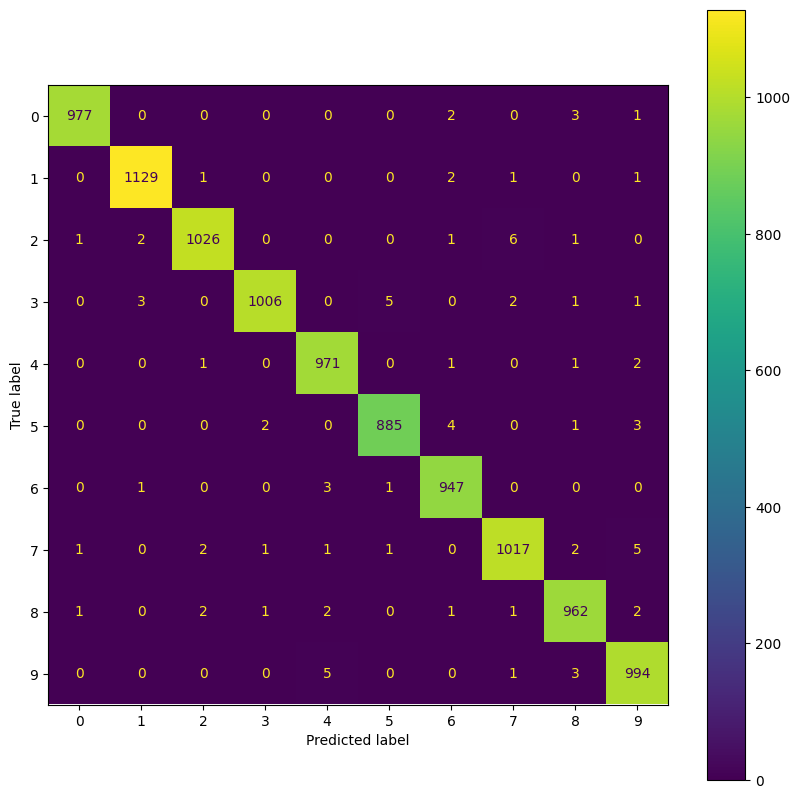

In [12]:
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

**Summary:**

> The accuracy score measures the number of correct predictions made by a model with the total number of predictions made. The higher the accuracy score, the better. The above model's accuracy is 99.1, which is very good. The confusion matrix supports the same.